In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import load_wine

In [30]:
df = sns.load_dataset("diamonds")

In [31]:
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [32]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [33]:
numeric_df = df[['carat', 'depth', 'table', 'price', 'x', 'y','z', 'cut']]

In [34]:
numeric_df.head(5)

,carat,depth,table,price,x,y,z,cut
0,0.23,61.5,55.0,326,3.95,3.98,2.43,Ideal
1,0.21,59.8,61.0,326,3.89,3.84,2.31,Premium
2,0.23,56.9,65.0,327,4.05,4.07,2.31,Good
3,0.29,62.4,58.0,334,4.20,4.23,2.63,Premium
4,0.31,63.3,58.0,335,4.34,4.35,2.75,Good


In [35]:
X = numeric_df.to_numpy()[:,:7]

In [36]:
X = numeric_df.to_numpy()[:, :7]
pca = PCA(2)
X_r = pca.fit(X).transform(X)
data = pd.DataFrame(X_r)
data['cut'] = numeric_df["cut"]
data

,0,1,cut
0,-3606.800710,-2.111734,Ideal
1,-3606.800346,4.101557,Premium
2,-3605.799951,8.771649,Good
3,-3598.800339,0.523626,Premium
4,-3597.800258,0.279173,Good
...,...,...,...
53935,-1175.799658,-0.055747,Ideal
53936,-1175.799810,-2.627110,Good
53937,-1175.799487,2.235059,Very Good
53938,-1175.799347,0.880287,Premium


Text(0.5, 1.0, 'PCA')

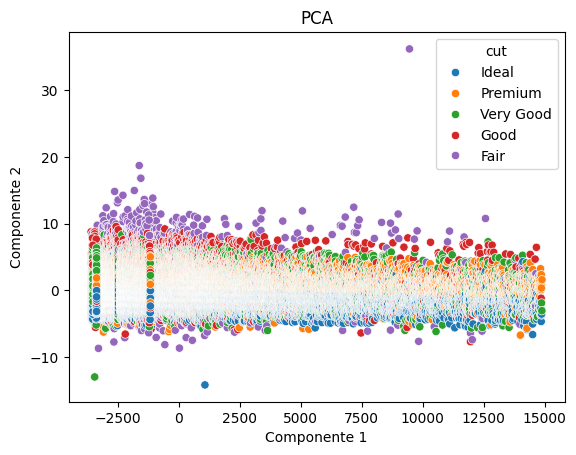

In [37]:
fig = sns.scatterplot(data=data, x = 0, y= 1, hue="cut")
fig.set_xlabel("Componente 1")
fig.set_ylabel("Componente 2")
fig.set_title("PCA")

In [38]:
#TSNE
numeric_df_2 = numeric_df.drop("cut", axis= 1)

In [40]:
tsne = TSNE(2)

X = tsne.fit_transform(numeric_df_2)
X

array([[-131.66931  ,   41.24815  ],
       [-131.66962  ,   41.256023 ],
       [-131.67296  ,   41.265102 ],
       ...,
       [   3.7114882,    7.8462243],
       [   4.1651645,    7.8628297],
       [   4.7986856,    7.737136 ]], dtype=float32)

In [49]:
wine = load_wine()
X = wine.data
Y = wine.target
df = pd.DataFrame(X, columns = wine.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [50]:
pca = PCA(2)
X=pca.fit_transform(df)
X

array([[ 3.18562979e+02,  2.14921307e+01],
       [ 3.03097420e+02, -5.36471768e+00],
       [ 4.38061133e+02, -6.53730945e+00],
       [ 7.33240139e+02,  1.92729032e-01],
       [-1.15714285e+01,  1.84899946e+01],
       [ 7.03231192e+02, -3.32158674e-01],
       [ 5.42971581e+02, -1.35189666e+01],
       [ 5.48401860e+02,  1.14494324e+01],
       [ 2.98036863e+02, -8.18015784e+00],
       [ 2.98049553e+02, -7.10154294e+00],
       [ 7.63079712e+02, -8.33431723e+00],
       [ 5.32943228e+02, -1.42876338e+01],
       [ 5.72834410e+02, -2.10050143e+01],
       [ 4.02925358e+02, -1.61026352e+01],
       [ 8.00053394e+02, -1.21184472e+01],
       [ 5.63245578e+02,  2.21482866e+00],
       [ 5.33379651e+02,  1.08048022e+01],
       [ 3.83317591e+02,  8.47741982e+00],
       [ 9.33118387e+02, -8.35447844e+00],
       [ 9.84031775e+01,  1.43926594e+01],
       [ 3.35935940e+01,  2.55679565e+01],
       [ 2.31464375e+01,  1.81747309e+00],
       [ 2.88093030e+02, -3.96304175e+00],
       [ 2.

<Axes: xlabel='0', ylabel='1'>

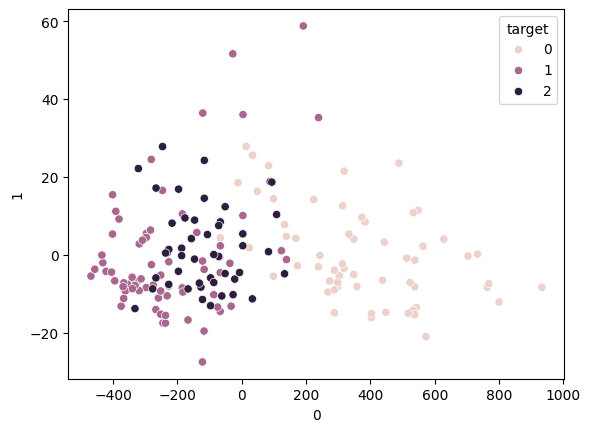

In [53]:
df_pca = pd.DataFrame(X)
df_pca['target'] = Y
sns.scatterplot(data= df_pca, x=0, y=1, hue="target")

In [55]:
tsne = TSNE(n_components= 2, random_state=42)
X_tsne = tsne.fit_transform(df)
df_tsne = pd.DataFrame(X_tsne)
df_tsne["target"] = Y
df_tsne

,0,1,target
0,11.885133,-0.480538,0
1,11.506394,-1.147849,0
2,14.050035,-1.015527,0
3,16.863930,-1.384284,0
4,3.268320,-0.451542,0
...,...,...,...
173,3.289910,-0.019914,2
174,3.707676,-0.103938,2
175,6.272249,-0.490825,2
176,6.423851,-0.620846,2


<Axes: xlabel='0', ylabel='1'>

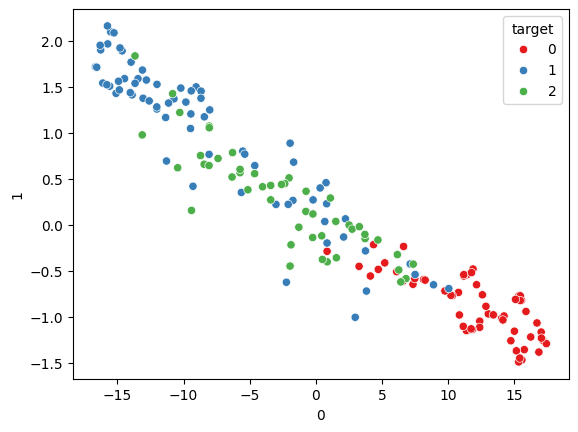

In [57]:
sns.scatterplot(data=df_tsne, x=0, y=1, hue="target", palette='Set1')